### Context
In today’s competitive world, it is crucial to understand customer behavior and categorize customers based on their demography and buying behavior. This is a critical aspect of customer segmentation that allows marketers to better tailor their marketing efforts to various audience subsets in terms of promotional, marketing and product development strategies.

### Objective
This article demonstrates the concept of segmentation of a customer data set from an e-commerce site using k-means clustering in python. The data set contains the annual income of ~300 customers and their annual spend on an e-commerce site. We will use the k-means clustering algorithm to derive the optimum number of clusters and understand the underlying customer segments based on the data provided.

### About the data set

In [3]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

# Read the CSV file
dataset = pd.read_csv('../data/raw/CLV.csv')

# Explore the dataset
print(dataset.head()) # top 5 columns
len(dataset) # of rows

#descriptive statistics of the dataset
dataset.describe().transpose()

   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163


,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


The dataset consists of 303 rows. The mean annual income is 245000 and the mean annual spend is 149000. The distribution of the annual income and annual spend has been illustrated with a distplot and violinplot.

### Visualizing the data
The displot and violinplot give an indication of the data distribution of Income and Spend.

Text(0.5,0,'Income / spend')

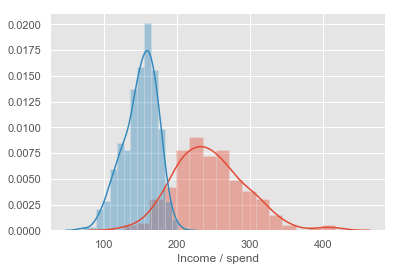

In [2]:
# Visualizing the data - displot
plot_income = sns.distplot(dataset["INCOME"])
plot_spend = sns.distplot(dataset["SPEND"])
plt.xlabel('Income / spend')

[(0, 420)]

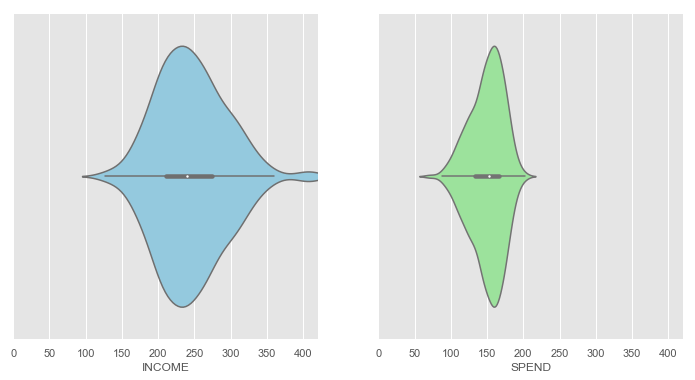

In [3]:
#Violin plot of Income and Spend
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='INCOME', color="skyblue", ax=axes[0])
v2 = sns.violinplot(data=dataset, x='SPEND', color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

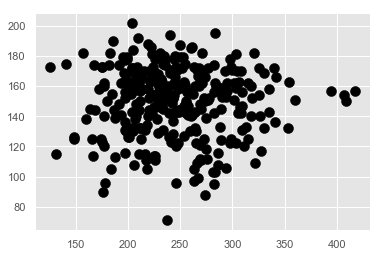

In [4]:
# Plotting the values to understand the spread
Income  = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

### Clustering fundamentals
Clustering is an unsupervised machine learning technique, where there are no defined dependent and independent variables. The patterns in the data are used to identify / group similar observations.

The objective of any clustering algorithm is to ensure that the distance between datapoints in a cluster is very low compared to the distance between 2 clusters. In other words, members of a group are very similar, and members of different groups are extremely dissimilar.

We will use are k-means clustering for creating customer segments based on their income and spend data.

### K-Means clustering
K-means clustering is an iterative clustering algorithm where the number of clusters K is predetermined and the algorithm iteratively assigns each data point to one of the K clusters based on the feature similarity.

#### Broad steps of the k-means algorithm

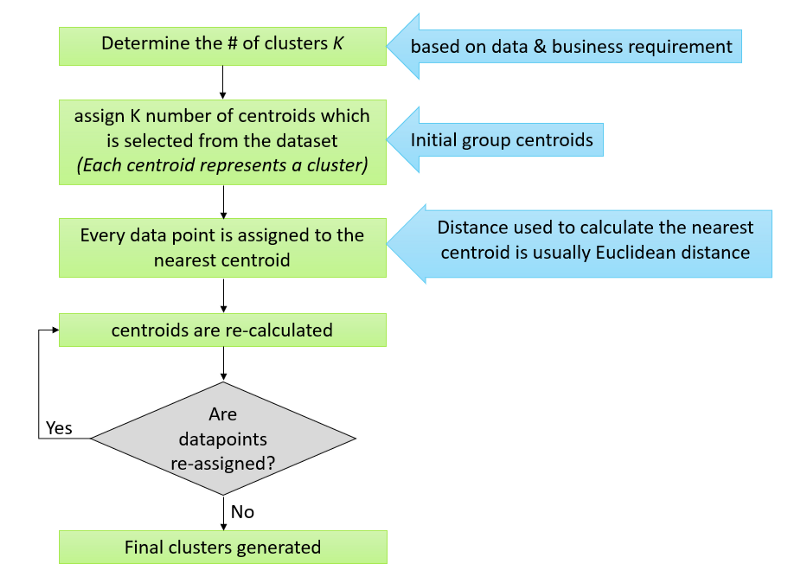


The mathematics of clustering

The mathematics behind clustering, in very simple terms involves minimizing the sum of square of distances between the cluster centroid and its associated data points:

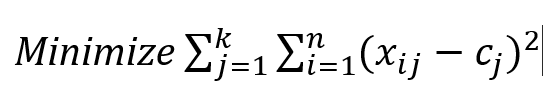

K = number of clusters

N= number of data points

C=centroid of cluster j

(xij — cj)– Distance between data point and centroid to which it is assigned
### Deciding on the optimum number of clusters ‘K’
The main input for k-means clustering is the number of clusters. This is derived using the concept of minimizing within cluster sum of square (WCSS). A scree plot is created which plots the number of clusters in the X axis and the WCSS for each cluster number in the y-axis.

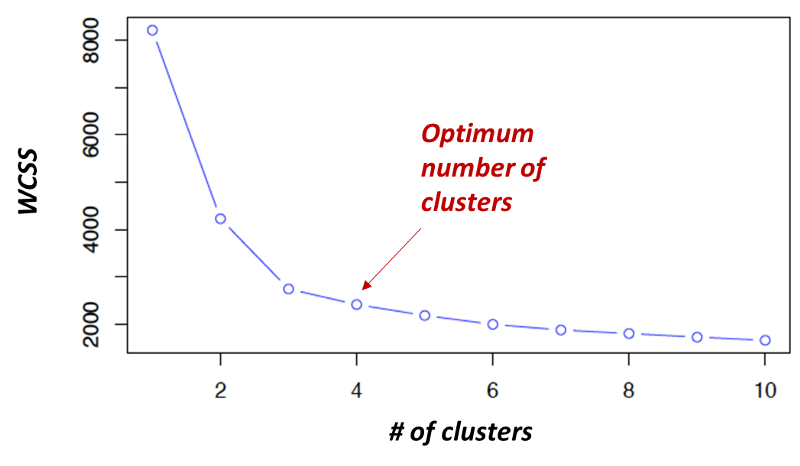

As the number of clusters increase, the WCSS keeps decreasing. The decrease of WCSS is initially steep and then the rate of decrease slows down resulting in an elbow plot. The number of clusters at the elbow formation usually gives an indication on the optimum number of clusters. This combined with specific knowledge of the business requirement should be used to decide on the optimum number of clusters.

For our dataset, we will arrive at the optimum number of clusters using the elbow method:

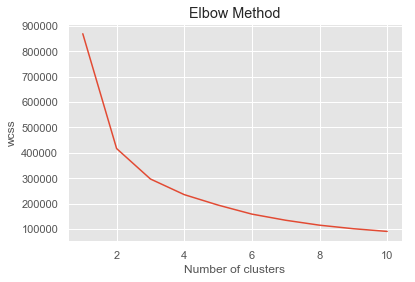

                                         Scree plot of given datatset on customer Income & Spend


In [5]:
# Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

print('                                         Scree plot of given datatset on customer Income & Spend')

Based on the elbow plot, we could choose 4,5 or 6 clusters. Let us try both the number of clusters and visualize the clusters to decide on the final number of clusters.

Fitting the k-means to the dataset with k=4

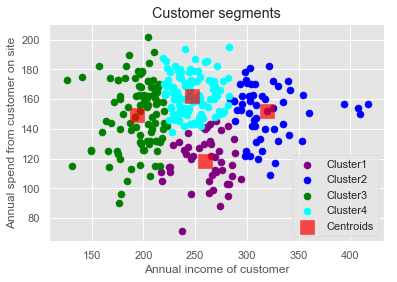

In [6]:
# Fitting kmeans to the dataset with k = 4
km4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state = 0)
y_means = km4.fit_predict(dataset)

# Visualizing the clusters for k = 4
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 50, c = 'purple', label = 'Cluster1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_means == 2,0], X[y_means == 2, 1], s = 50, c = 'green', label = 'Cluster3')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], s = 50, c = 'cyan', label = 'Cluster4')

plt.scatter(km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1], s = 200, marker = 's', c = 'red', alpha = 0.7, label = 'Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

The plot shows the distribution of the 4 clusters. We could interpret them as the following customer segments:

Cluster 1: Customers with medium annual income and low annual spend

Cluster 2: Customers with high annual income and medium to high annual spend

Cluster 3: Customers with low annual income

Cluster 4: Customers with medium annual income but high annual spend

Cluster 4 straight away is one potential customer segment. However, Cluster 2 and 3 can be segmented further to arrive at a more 

specific target customer group. Let us now look at how the clusters are created when k=6:

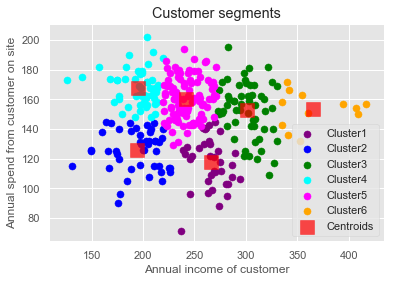

In [7]:
## Fitting K-Means to the dataset - k=6
km6 = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_means = km6.fit_predict(X)

#Visualizing the clusters
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 50, c = 'purple', label = 'Cluster1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 50, c = 'green', label = 'Cluster3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 50, c = 'cyan', label = 'Cluster4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 50, c = 'magenta', label = 'Cluster5')
plt.scatter(X[y_means == 5, 0], X[y_means == 5, 1], s = 50, c = 'orange', label = 'Cluster6')

plt.scatter(km6.cluster_centers_[:, 0], km6.cluster_centers_[:, 1], s = 200, marker = 's', c = 'red', alpha = 0.7, label = 'Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

In [8]:
km6.cluster_centers_[:,0]

array([265.58333333, 193.93478261, 301.07142857, 195.05769231,
       242.03960396, 365.58333333])

In [1]:
help(sklearn.cluster)

NameError: name 'sklearn' is not defined

In [13]:
km6.cluster_centers_

array([[265.58333333, 117.44444444],
       [193.93478261, 125.63043478],
       [301.07142857, 152.91071429],
       [195.05769231, 167.82692308],
       [242.03960396, 160.46534653],
       [365.58333333, 153.25      ]])

In [9]:
from sklearn import KMeans

In [11]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time t